In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("CREMP_Pcover_2023_TaxaGroups.csv")

In [6]:
data.head()

,Year,Date,Subregion,Habitat,SiteID,Site_name,StationID,Surveyed_all_years,points,Cyanobacteria,Macroalgae,Octocoral,Others,Porifera,Seagrass,Stony_coral,Substrate,Unknown,Urchins,Zoanthidea
0,1996,7/25/1996,UK,HB,10,Rattlesnake,101,N,479,NaN,0.1587,0.0230,0.0,0.0125,0.0042,0.0,0.8017,NaN,0.0,0.0
1,1996,7/25/1996,UK,HB,10,Rattlesnake,102,N,525,NaN,0.2476,0.0400,0.0,0.0305,0.0000,0.0,0.6819,NaN,0.0,0.0
2,1996,7/25/1996,UK,HB,10,Rattlesnake,103,N,558,NaN,0.0323,0.0412,0.0,0.0394,0.0036,0.0,0.8835,NaN,0.0,0.0
3,1996,7/25/1996,UK,HB,10,Rattlesnake,104,N,446,NaN,0.4260,0.0493,0.0,0.0404,0.0000,0.0,0.4843,NaN,0.0,0.0
4,1996,7/22/1996,UK,HB,11,El Radabob,111,N,450,NaN,0.3156,0.0067,0.0,0.0000,0.3133,0.0,0.3644,NaN,0.0,0.0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3918 entries, 0 to 3917
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                3918 non-null   int64  
 1   Date                3912 non-null   object 
 2   Subregion           3918 non-null   object 
 3   Habitat             3918 non-null   object 
 4   SiteID              3918 non-null   int64  
 5   Site_name           3918 non-null   object 
 6   StationID           3918 non-null   int64  
 7   Surveyed_all_years  3918 non-null   object 
 8   points              3918 non-null   int64  
 9   Cyanobacteria       2171 non-null   float64
 10  Macroalgae          3918 non-null   float64
 11  Octocoral           3918 non-null   float64
 12  Others              3918 non-null   float64
 13  Porifera            3918 non-null   float64
 14  Seagrass            3918 non-null   float64
 15  Stony_coral         3918 non-null   float64
 16  Substr

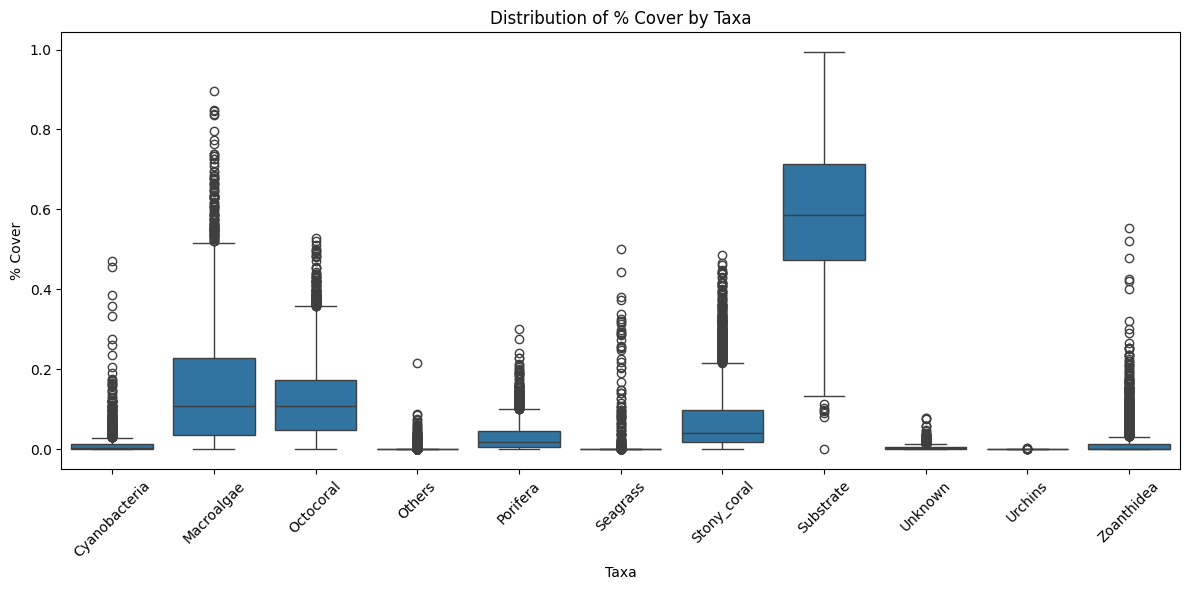

In [10]:
# 🌱 Percent Cover Distribution (All Taxa)

cover_cols = [
    'Cyanobacteria', 'Macroalgae', 'Octocoral', 'Others', 'Porifera',
    'Seagrass', 'Stony_coral', 'Substrate', 'Unknown', 'Urchins', 'Zoanthidea'
]

melted = data[cover_cols].melt(var_name="Taxa", value_name="% Cover")

plt.figure(figsize=(12, 6))
sns.boxplot(data=melted, x="Taxa", y="% Cover")
plt.title("Distribution of % Cover by Taxa")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

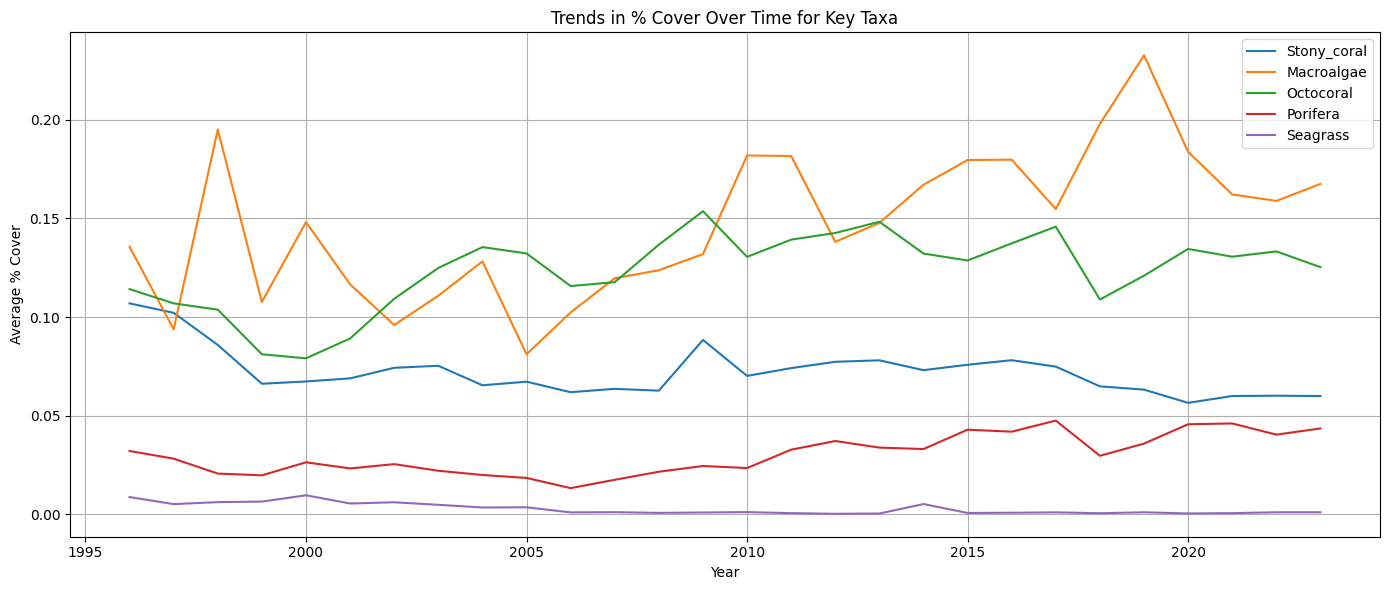

In [12]:
# 📈 Trends in Dominant Taxa Over Time

taxa_means_by_year = data.groupby("Year")[cover_cols].mean()

plt.figure(figsize=(14, 6))
for taxa in ['Stony_coral', 'Macroalgae', 'Octocoral', 'Porifera', 'Seagrass']:
    sns.lineplot(x=taxa_means_by_year.index, y=taxa_means_by_year[taxa], label=taxa)

plt.title("Trends in % Cover Over Time for Key Taxa")
plt.xlabel("Year")
plt.ylabel("Average % Cover")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

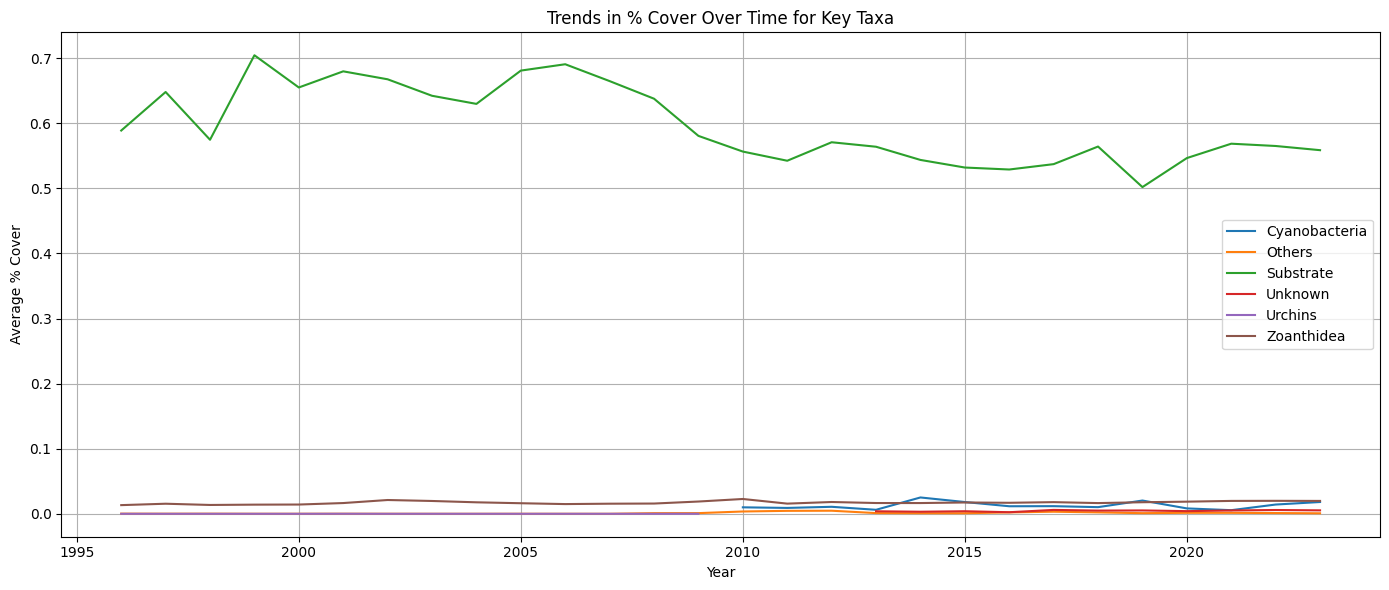

In [16]:
# 📈 Trends in Dominant Taxa Over Time

taxa_means_by_year = data.groupby("Year")[cover_cols].mean()

plt.figure(figsize=(14, 6))
for taxa in ['Cyanobacteria', 'Others','Substrate', 'Unknown', 'Urchins', 'Zoanthidea']:
    sns.lineplot(x=taxa_means_by_year.index, y=taxa_means_by_year[taxa], label=taxa)

plt.title("Trends in % Cover Over Time for Key Taxa")
plt.xlabel("Year")
plt.ylabel("Average % Cover")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

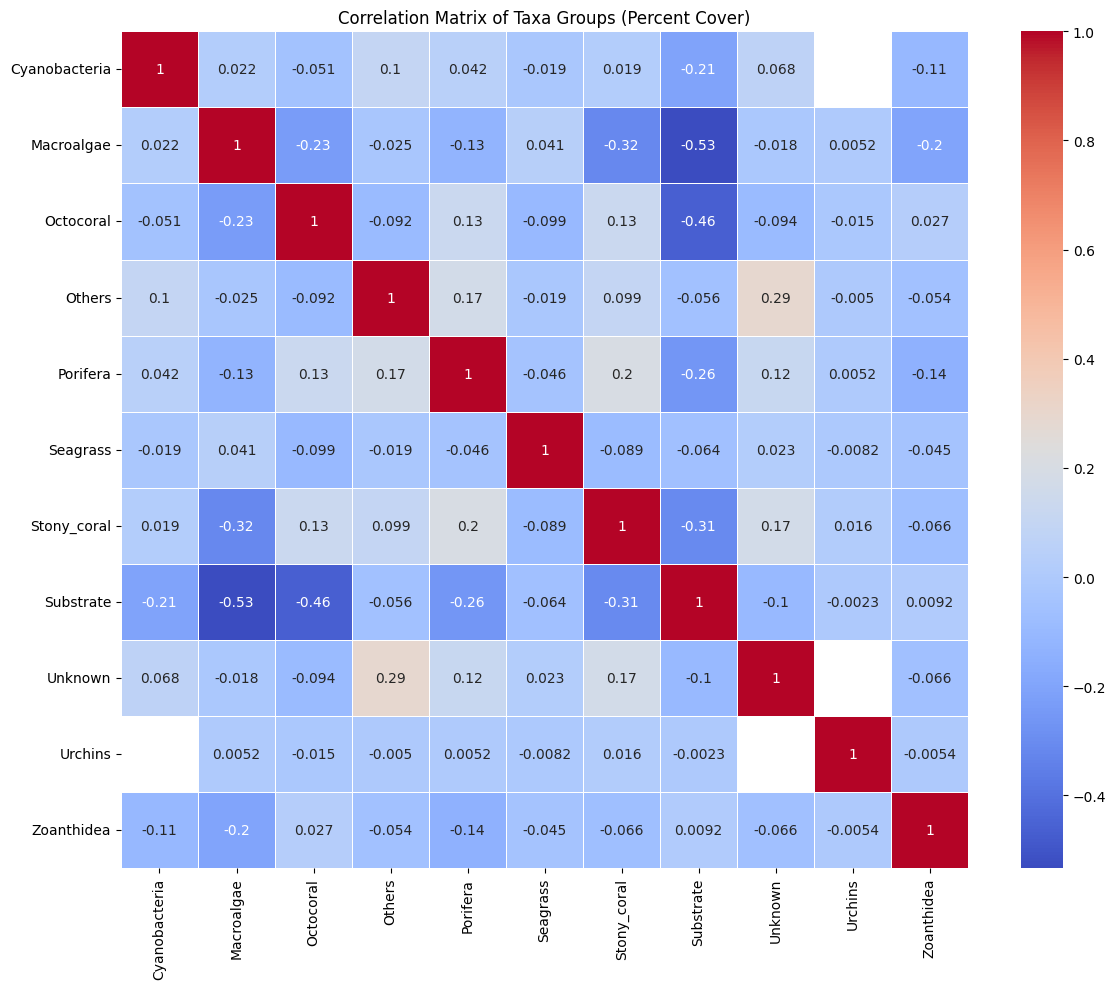

In [21]:
# 🔗 Correlation Between Taxa Groups

corr_matrix = data[cover_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Taxa Groups (Percent Cover)")
plt.tight_layout()
plt.show()

In [23]:
corr_matrix

,Cyanobacteria,Macroalgae,Octocoral,Others,Porifera,Seagrass,Stony_coral,Substrate,Unknown,Urchins,Zoanthidea
Cyanobacteria,1.000000,0.022019,-0.051221,0.099647,0.042381,-0.018505,0.019201,-0.208030,0.068000,NaN,-0.106373
Macroalgae,0.022019,1.000000,-0.234731,-0.025177,-0.129761,0.041017,-0.316440,-0.533040,-0.017961,0.005231,-0.203513
Octocoral,-0.051221,-0.234731,1.000000,-0.091950,0.129132,-0.099428,0.125823,-0.461246,-0.094178,-0.014994,0.026507
Others,0.099647,-0.025177,-0.091950,1.000000,0.171706,-0.019136,0.098507,-0.055839,0.289819,-0.005046,-0.053977
Porifera,0.042381,-0.129761,0.129132,0.171706,1.000000,-0.045722,0.202073,-0.258702,0.116788,0.005162,-0.138541
Seagrass,-0.018505,0.041017,-0.099428,-0.019136,-0.045722,1.000000,-0.088723,-0.064246,0.022875,-0.008167,-0.044513
Stony_coral,0.019201,-0.316440,0.125823,0.098507,0.202073,-0.088723,1.000000,-0.307169,0.170708,0.016111,-0.066040
Substrate,-0.208030,-0.533040,-0.461246,-0.055839,-0.258702,-0.064246,-0.307169,1.000000,-0.100463,-0.002327,0.009163
Unknown,0.068000,-0.017961,-0.094178,0.289819,0.116788,0.022875,0.170708,-0.100463,1.000000,NaN,-0.065541
Urchins,NaN,0.005231,-0.014994,-0.005046,0.005162,-0.008167,0.016111,-0.002327,NaN,1.000000,-0.005380


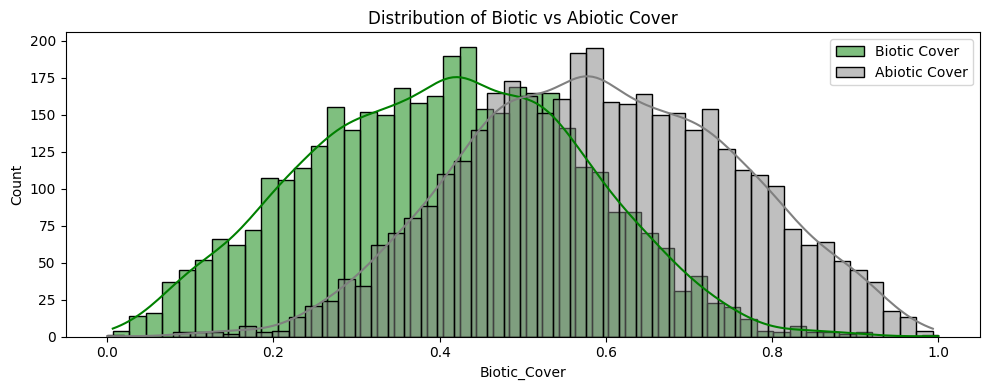

In [25]:
# 🧮 Total Biotic vs Abiotic Cover

# Assuming: Substrate, Unknown = abiotic | others are biotic
data['Biotic_Cover'] = data[['Cyanobacteria', 'Macroalgae', 'Octocoral', 'Porifera',
                             'Seagrass', 'Stony_coral', 'Urchins', 'Zoanthidea']].sum(axis=1)
data['Abiotic_Cover'] = data[['Substrate', 'Unknown']].sum(axis=1)

plt.figure(figsize=(10, 4))
sns.histplot(data['Biotic_Cover'], bins=50, color='green', label='Biotic Cover', kde=True)
sns.histplot(data['Abiotic_Cover'], bins=50, color='gray', label='Abiotic Cover', kde=True)
plt.title("Distribution of Biotic vs Abiotic Cover")
plt.legend()
plt.tight_layout()
plt.show()

In [31]:
# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

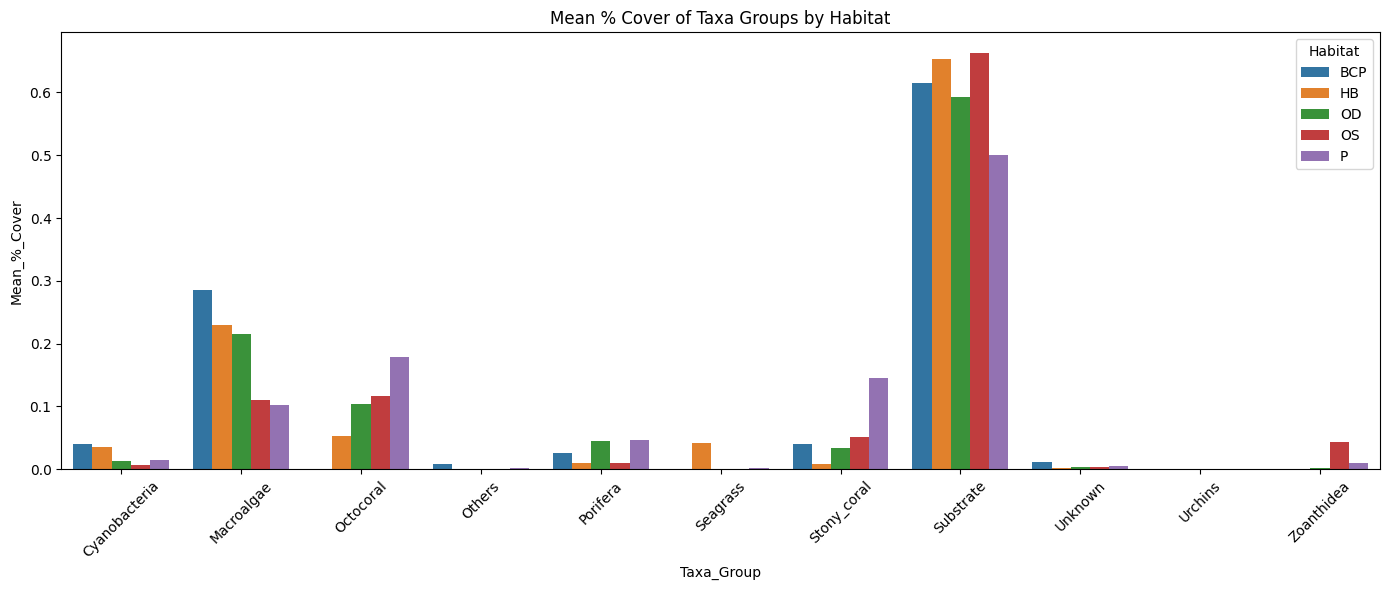

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

taxa_columns = [
    'Cyanobacteria', 'Macroalgae', 'Octocoral', 'Others', 'Porifera',
    'Seagrass', 'Stony_coral', 'Substrate', 'Unknown', 'Urchins', 'Zoanthidea'
]

grouped = data.groupby('Habitat')[taxa_columns].mean().reset_index()
melted = grouped.melt(id_vars='Habitat', var_name='Taxa_Group', value_name='Mean_%_Cover')

plt.figure(figsize=(14, 6))
sns.barplot(data=melted, x='Taxa_Group', y='Mean_%_Cover', hue='Habitat')
plt.xticks(rotation=45)
plt.title('Mean % Cover of Taxa Groups by Habitat')
plt.tight_layout()
plt.show()

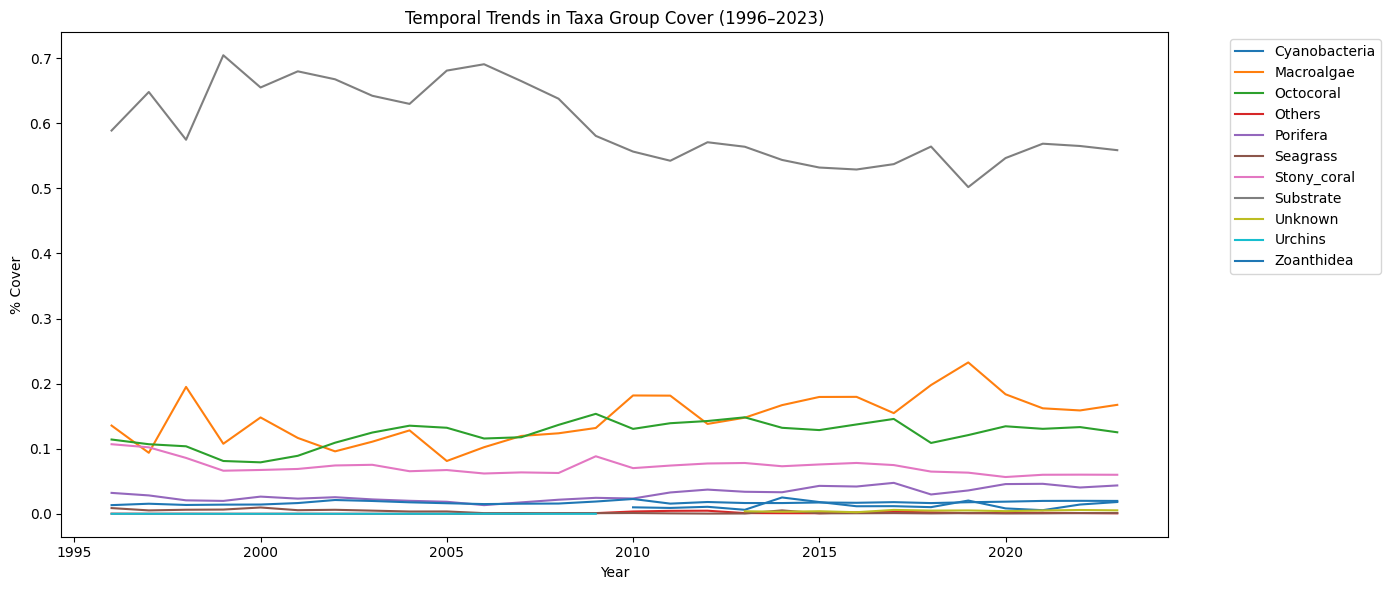

In [35]:
# 📈 Trends Over Time: Taxa Group Cover by Year

grouped_year = data.groupby('Year')[taxa_columns].mean().reset_index()

plt.figure(figsize=(14, 6))
for taxa in taxa_columns:
    sns.lineplot(data=grouped_year, x='Year', y=taxa, label=taxa)

plt.title('Temporal Trends in Taxa Group Cover (1996–2023)')
plt.ylabel('% Cover')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

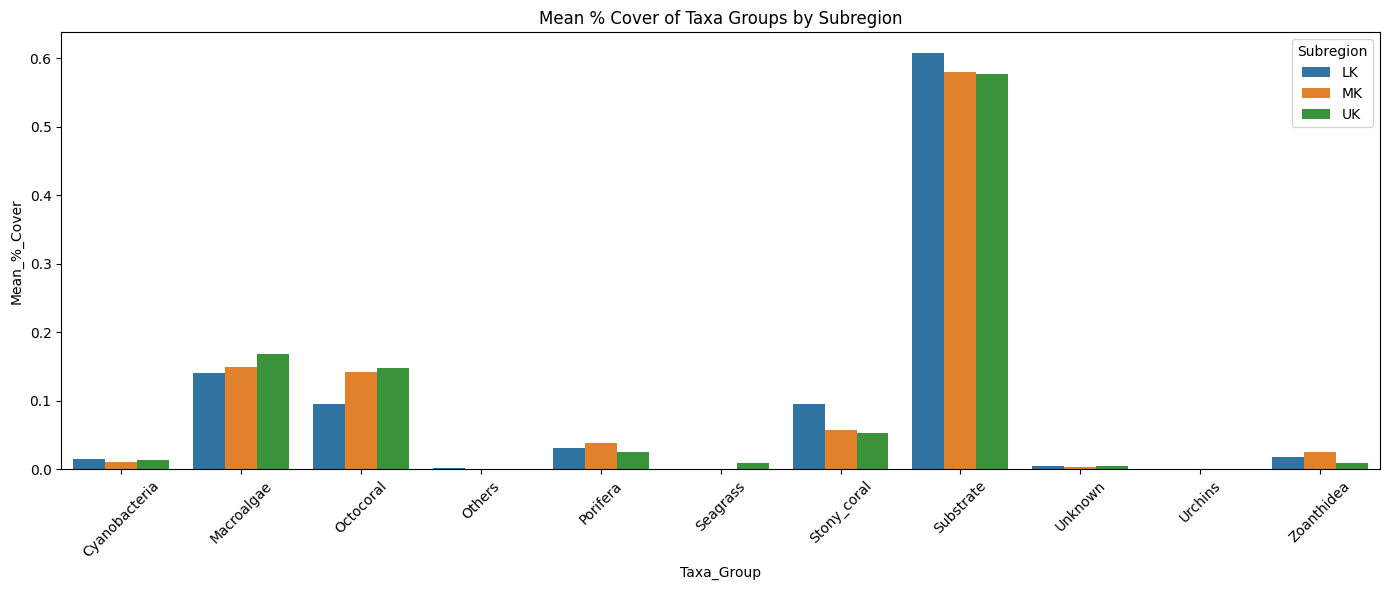

In [37]:
# 🗺️ Mean % Cover by Subregion

grouped_region = data.groupby('Subregion')[taxa_columns].mean().reset_index()
melted_region = grouped_region.melt(id_vars='Subregion', var_name='Taxa_Group', value_name='Mean_%_Cover')

plt.figure(figsize=(14, 6))
sns.barplot(data=melted_region, x='Taxa_Group', y='Mean_%_Cover', hue='Subregion')
plt.xticks(rotation=45)
plt.title('Mean % Cover of Taxa Groups by Subregion')
plt.tight_layout()
plt.show()

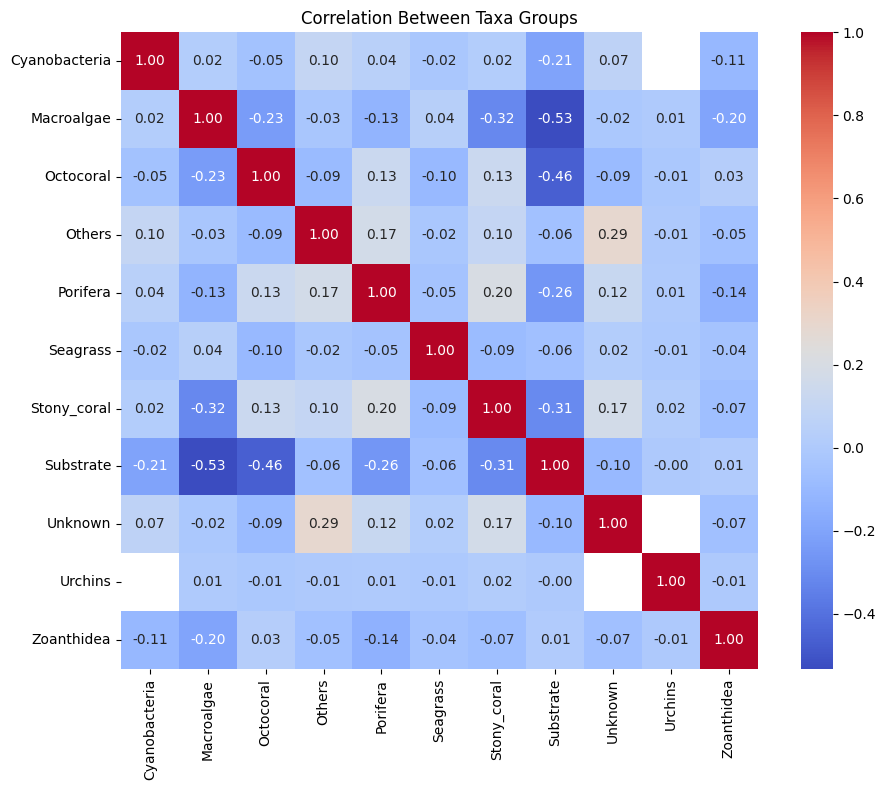

In [39]:
# 🔥 Heatmap: Correlation Among Taxa Groups

corr_matrix = data[taxa_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Between Taxa Groups')
plt.tight_layout()
plt.show()

In [41]:
corr_matrix

,Cyanobacteria,Macroalgae,Octocoral,Others,Porifera,Seagrass,Stony_coral,Substrate,Unknown,Urchins,Zoanthidea
Cyanobacteria,1.000000,0.022019,-0.051221,0.099647,0.042381,-0.018505,0.019201,-0.208030,0.068000,NaN,-0.106373
Macroalgae,0.022019,1.000000,-0.234731,-0.025177,-0.129761,0.041017,-0.316440,-0.533040,-0.017961,0.005231,-0.203513
Octocoral,-0.051221,-0.234731,1.000000,-0.091950,0.129132,-0.099428,0.125823,-0.461246,-0.094178,-0.014994,0.026507
Others,0.099647,-0.025177,-0.091950,1.000000,0.171706,-0.019136,0.098507,-0.055839,0.289819,-0.005046,-0.053977
Porifera,0.042381,-0.129761,0.129132,0.171706,1.000000,-0.045722,0.202073,-0.258702,0.116788,0.005162,-0.138541
Seagrass,-0.018505,0.041017,-0.099428,-0.019136,-0.045722,1.000000,-0.088723,-0.064246,0.022875,-0.008167,-0.044513
Stony_coral,0.019201,-0.316440,0.125823,0.098507,0.202073,-0.088723,1.000000,-0.307169,0.170708,0.016111,-0.066040
Substrate,-0.208030,-0.533040,-0.461246,-0.055839,-0.258702,-0.064246,-0.307169,1.000000,-0.100463,-0.002327,0.009163
Unknown,0.068000,-0.017961,-0.094178,0.289819,0.116788,0.022875,0.170708,-0.100463,1.000000,NaN,-0.065541
Urchins,NaN,0.005231,-0.014994,-0.005046,0.005162,-0.008167,0.016111,-0.002327,NaN,1.000000,-0.005380


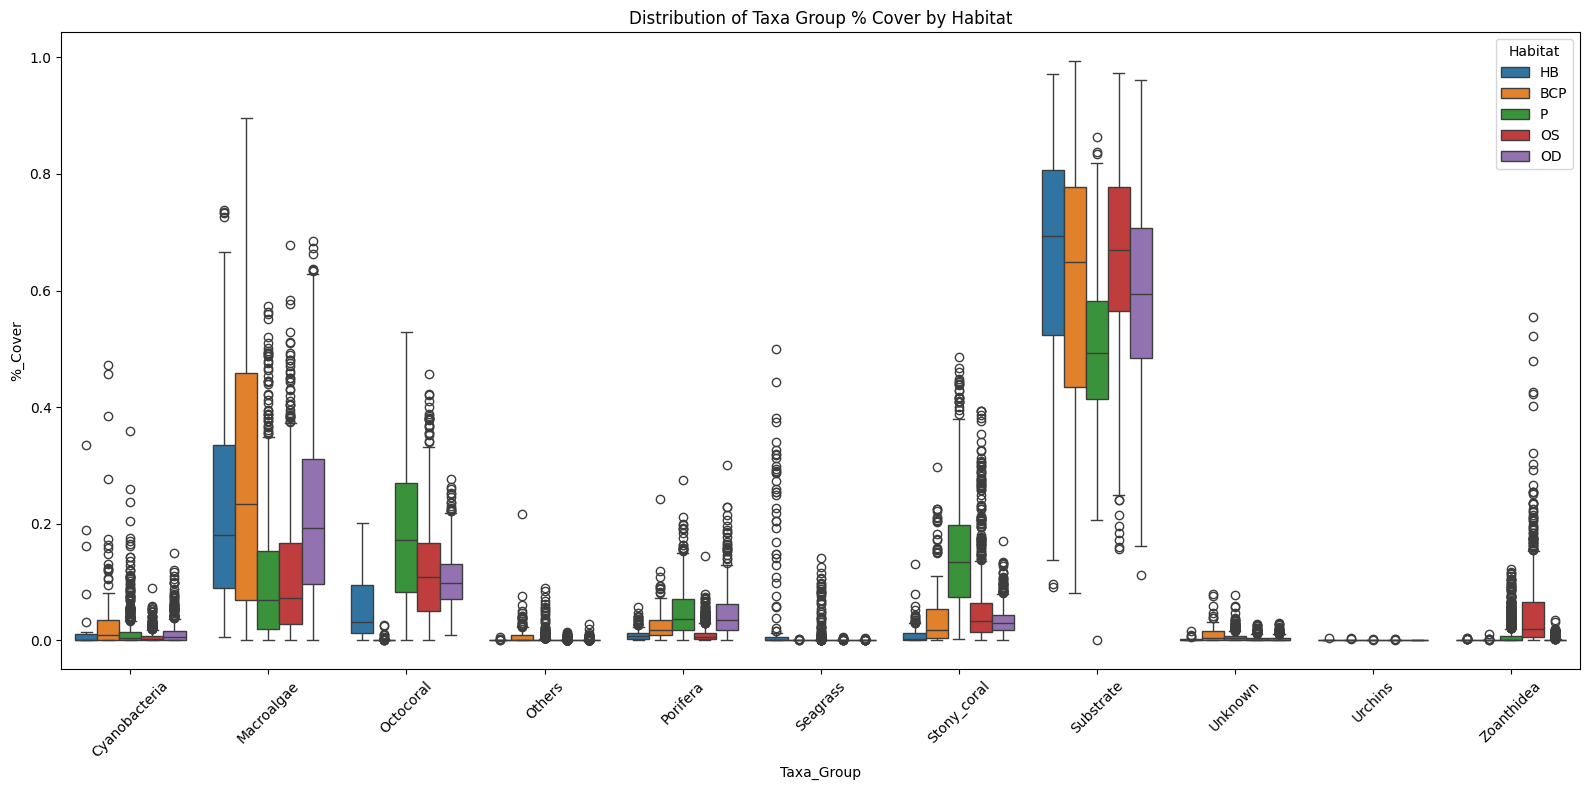

In [43]:
# 📌 Taxa Group Distribution by Habitat (Boxplots for Variation)

melted_all = data.melt(
    id_vars='Habitat', value_vars=taxa_columns, var_name='Taxa_Group', value_name='%_Cover'
)

plt.figure(figsize=(16, 8))
sns.boxplot(data=melted_all, x='Taxa_Group', y='%_Cover', hue='Habitat')
plt.xticks(rotation=45)
plt.title('Distribution of Taxa Group % Cover by Habitat')
plt.tight_layout()
plt.show()